In [1]:
endpoint = "https://apil-document-intel-instance.cognitiveservices.azure.com/"
key = "<insert key>"

In [5]:
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential


In [6]:
document_analysis_client = DocumentAnalysisClient(endpoint, AzureKeyCredential(key))

In [9]:
fileUri = "https://github.com/MicrosoftLearning/mslearn-ai-document-intelligence/blob/main/Labfiles/01-prebuild-models/sample-invoice/sample-invoice.pdf?raw=true"
fileLocale = "en-US"
fileModelId = "prebuilt-invoice"

In [10]:
poller = document_analysis_client.begin_analyze_document_from_url(model_id=fileModelId, locale=fileLocale, document_url=fileUri)    

In [11]:
receipts = poller.result()

In [13]:
for idx, receipt in enumerate(receipts.documents):
    print(f"Receipt {idx}")
    customer_name = receipt.fields.get("CustomerName")
    if customer_name:
        print(f"Customer Name: '{customer_name.value}, with confidence {customer_name.confidence}.")

    invoice_total = receipt.fields.get("InvoiceTotal")
    if invoice_total:
        print(f"Invoice Total: '{invoice_total.value.symbol}{invoice_total.value.amount}, with confidence {invoice_total.confidence}.")

Receipt 0
Customer Name: 'MICROSOFT CORPORATION, with confidence 0.919.
Invoice Total: '$110.0, with confidence 0.969.


In [1]:
from IPython.display import Image


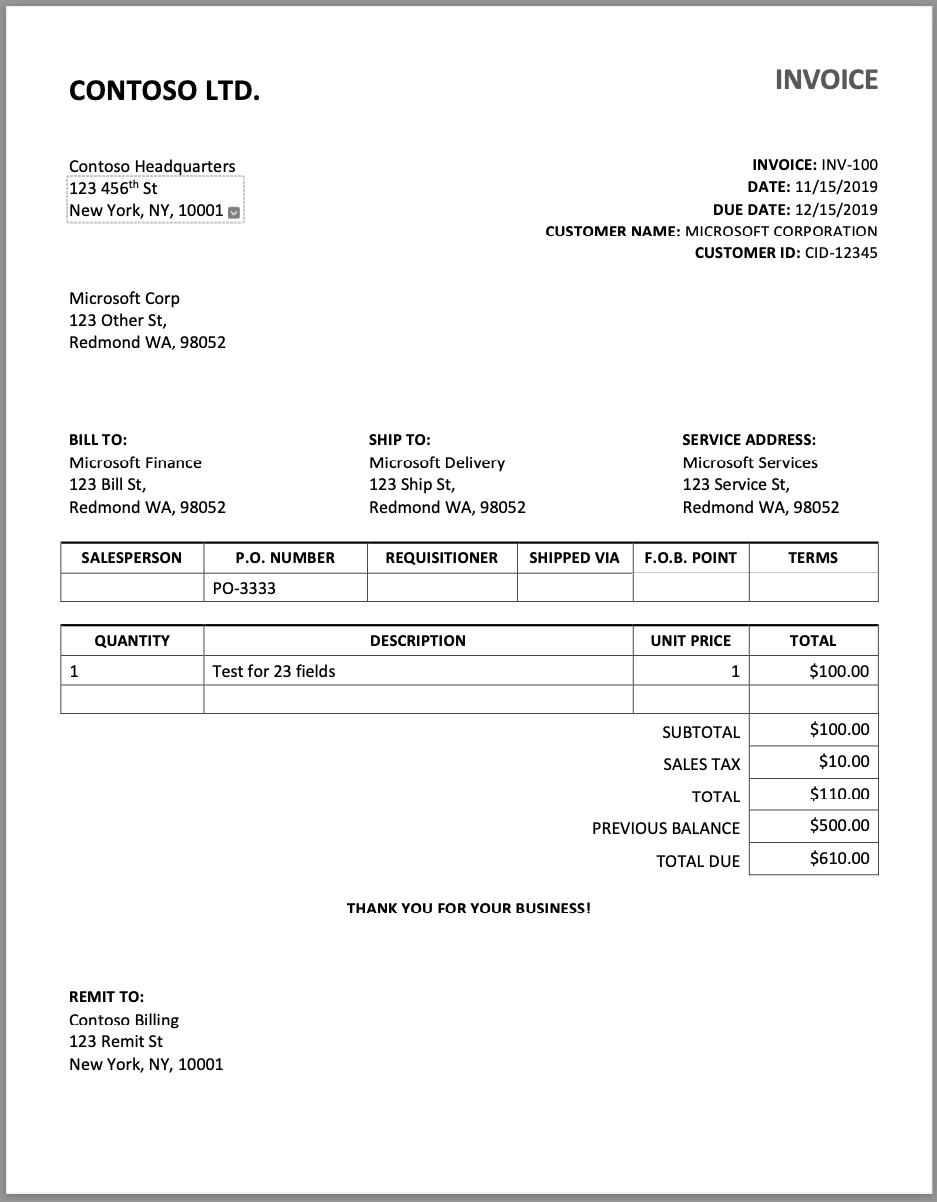

In [2]:
Image('../read_invoice-test.png')